In [67]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [89]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [99]:
colnames=['Id','Clump Thickness','Cell Size','Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
dataset = pd.read_csv('H:\MSIT 2nd Year\Recomendation system\Breast cancer detection\Data\cancer2.csv',names=colnames)
X = dataset.iloc[:, 1:10].values
Y = dataset.iloc[:, 10].values

In [100]:
dataset.head()

,Id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [101]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (699, 11)


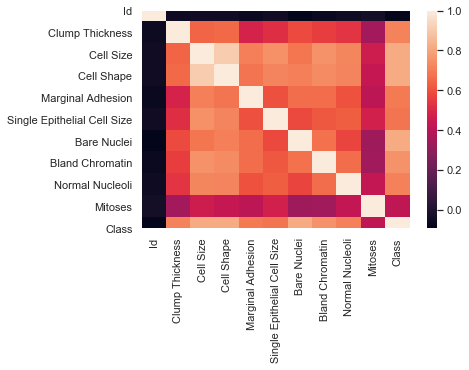

In [102]:
import seaborn as sns; sns.set()
corr = dataset.corr()
ax = sns.heatmap(corr)

From the above correlation plot, for the class variable is dependent on all the features of the data set but less on the Mitoses. So try to remove the feature and perform the analysis.

In [103]:
dataset.groupby('Class').size()

Class
2    458
4    241
dtype: int64

In [104]:
dataset=dataset.drop(['Mitoses'], axis=1)

In [105]:
dataset.head()

,Id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class
0,1000025,5,1,1,1,2,1,3,1,2
1,1002945,5,4,4,5,7,10,3,2,2
2,1015425,3,1,1,1,2,2,3,1,2
3,1016277,6,8,8,1,3,4,3,7,2
4,1017023,4,1,1,3,2,1,3,1,2


Class
2    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
4    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

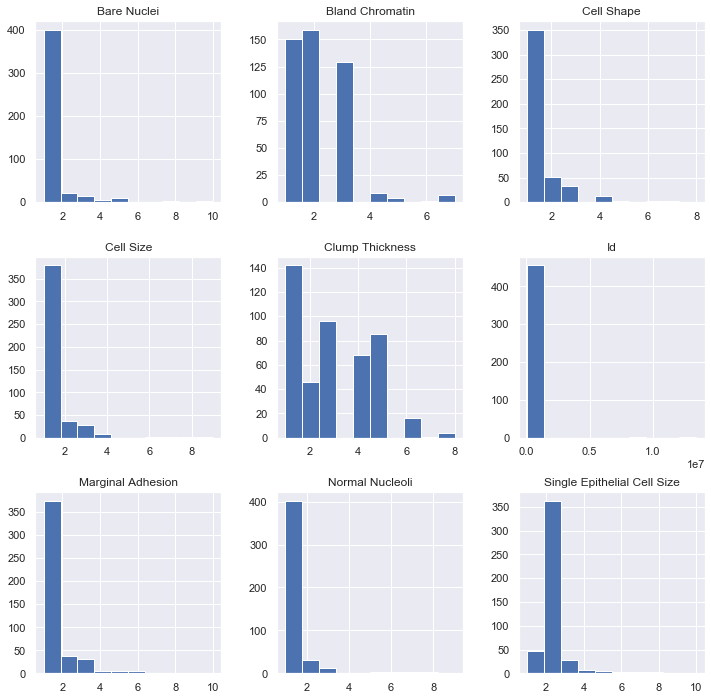

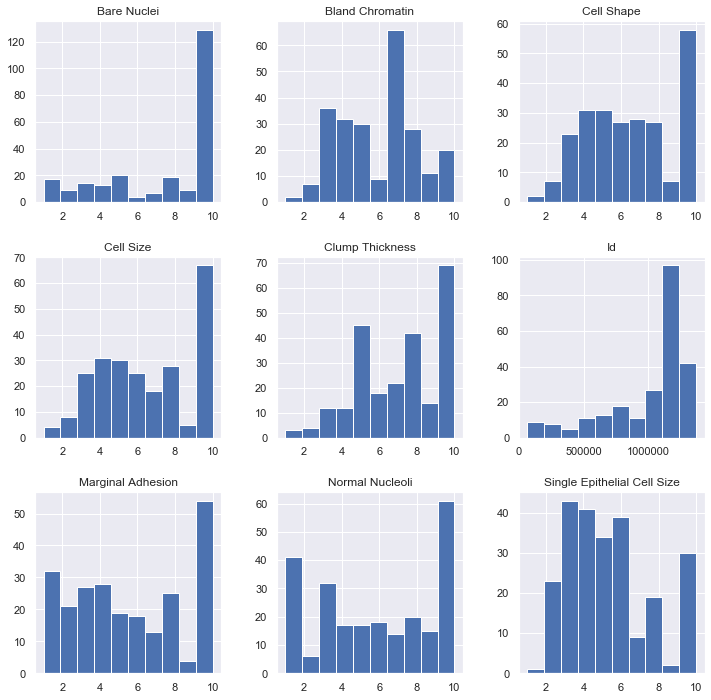

In [106]:
#Visualization of data
dataset.groupby('Class').hist(figsize=(12, 12))

In [107]:
dataset.isnull().sum()
dataset.isna().sum()

Id                             0
Clump Thickness                0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Class                          0
dtype: int64

In [108]:
dataframe = pd.DataFrame(Y)
dataframe.head()

,0
0,2
1,2
2,2
3,2
4,2


In [109]:
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [170]:
train_pct_index = int(0.75 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
Y_train, Y_test = Y[:train_pct_index], Y[train_pct_index:]

In [171]:
X_test

array([[ 3,  1,  1, ...,  2,  1,  1],
       [ 3,  1,  1, ...,  1,  1,  1],
       [ 4,  1,  1, ...,  1,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [166]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [167]:
X_test

array([[4, 1, 2, ..., 1, 1, 1],
       [4, 2, 2, ..., 2, 1, 1],
       [6, 6, 6, ..., 7, 8, 1],
       ...,
       [5, 3, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 3, 1, 1],
       [4, 1, 1, ..., 3, 2, 1]], dtype=int64)

In [172]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [173]:
X_test

array([[-0.53551968, -0.75510102, -0.79763392, ..., -0.66602336,
        -0.66515504, -0.37394974],
       [-0.53551968, -0.75510102, -0.79763392, ..., -1.09162853,
        -0.66515504, -0.37394974],
       [-0.19905408, -0.75510102, -0.79763392, ..., -1.09162853,
        -0.66515504, -0.37394974],
       ...,
       [ 0.13741153,  2.20013253,  2.20927381, ...,  1.88760767,
         2.22330828,  0.17035488],
       [-0.19905408,  1.54341396,  0.87287037, ...,  2.73881802,
         0.93954681, -0.37394974],
       [-0.19905408,  1.54341396,  1.54107209, ...,  2.73881802,
         0.29766607, -0.37394974]])

In [174]:
#Fitting the Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1],
      dtype=int64)

In [156]:
X_test

array([[-0.13474948, -0.68596557, -0.39584348, ..., -0.99465942,
        -0.61546674, -0.33390732],
       [-0.13474948, -0.36388138, -0.39584348, ..., -0.5845874 ,
        -0.61546674, -0.33390732],
       [ 0.58209037,  0.92445539,  0.93165721, ...,  1.46577269,
         1.62414835, -0.33390732],
       ...,
       [ 0.22367045, -0.04179719, -0.39584348, ..., -0.99465942,
        -0.61546674, -0.33390732],
       [-1.21000925, -0.68596557, -0.72771865, ..., -0.17451538,
        -0.61546674, -0.33390732],
       [-0.13474948, -0.68596557, -0.72771865, ..., -0.17451538,
        -0.29552173, -0.33390732]])

In [176]:
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[137,   0],
       [  0,  38]], dtype=int64)

In [177]:
"Accuracy: ",(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])

('Accuracy: ', 1.0)

In [178]:
#Same as above,
cm

array([[137,   0],
       [  0,  38]], dtype=int64)

In [179]:
"Accuracy:",(109+60)/(109+60+3+3)

('Accuracy:', 0.9657142857142857)

In [182]:
classifier.predict(X_test[0])

ValueError: Expected 2D array, got 1D array instead:
array=[-0.53551968 -0.75510102 -0.79763392 -0.66564258 -0.5914466  -0.76058926
 -0.66602336 -0.66515504 -0.37394974].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.